In [1]:
from fytok.Tokamak import Tokamak

2023-09-28 13:49:08,306 [   fytok]     INFO: 
#######################################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/      
Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences) 
URL         : https://gitee.com/openfusion/fytok_tutorial

version = 22eadf2-dirty
#######################################################################################################################

2023-09-28 13:49:08,324 [   fytok]     INFO: Mapping path [PosixPath('/home/salmon/workspace/fytok_tutorial/../fytok/python/fytok/_mapping')]
2023-09-28 13:49:08,514 [   fytok]     INFO: FyTok (0.2.0-153-gace0bd1-dirty) is compatible with the IMAS data dictionary 3.38.1-dirty.


In [2]:
tok = Tokamak("file+geqdsk:////home/salmon/workspace/fytok_tutorial/data/g900003.00230_ITER_15MA_eqdsk16HR.txt",
              device='ITER', shot='900003', time=2.3)



2023-09-28 13:49:08,614 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml


2023-09-28 13:49:08,631 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2023-09-28 13:49:08,655 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-09-28 13:49:08,657 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/python/spdm/plugins/data/plugin_geqdsk.py:437:__init__: Open File mode=Mode.read  URITuple(protocol='file+geqdsk', authority='', path='//home/salmon/workspace/fytok_tutorial/data/g900003.00230_ITER_15MA_eqdsk16HR.txt', query={'shot': '900003', 'run': '', 'uid': '900003'}, fragment='') 
2023-09-28 13:49:08,720 [   fytok]     INFO: Load module Wall 
2023-09-28 13:49:08,728 [   fytok]     INFO: Load module TF 
2023-09-28 13:49:08,733 [   fytok]     INFO: Load module PFActive 
2023-09-28 13:49:08,759 [   fytok]     INFO: Load module Magnetics 
2023-09-28 13:49:08,891 [   fytok]     INFO: Load module ECLaunchers 
2023-09-28 13:49:08,893 [   fytok]     INFO: Load module ICAntennas 
2023-09-28 13:49:08,896 [   fytok]     INFO: Load m

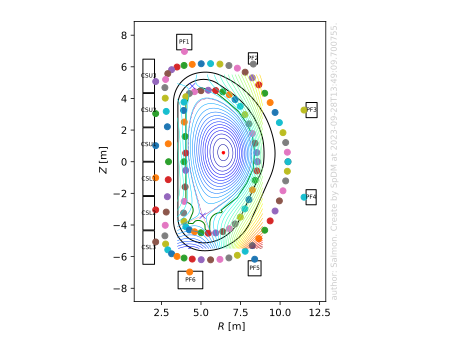

In [3]:
display(tok)